In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from idinn.sourcing_model import SingleSourcingModel, DualSourcingModel
from idinn.controller import SingleSourcingNeuralController, DualSourcingNeuralController, CappedDualIndexController
from torch.utils.tensorboard import SummaryWriter

In [4]:
sourcing_model = SingleSourcingModel(
    lead_time=1,
    holding_cost=5,
    shortage_cost=495,
    batch_size=2,
    init_inventory=10
)
controller = SingleSourcingNeuralController(
    hidden_layers=[2], activation=torch.nn.CELU(alpha=1)
)
controller.get_total_cost(sourcing_model, sourcing_periods=100)

tensor(2633050., grad_fn=<AddBackward0>)

In [ ]:
sourcing_model = SingleSourcingModel(
    lead_time=2, holding_cost=5, shortage_cost=495, batch_size=32, init_inventory=10
)

In [ ]:
controller.train(
    sourcing_model=sourcing_model,
    sourcing_periods=50,
    validation_sourcing_periods=1000,
    epochs=5000,
    seed=1,
    tensorboard_writer=SummaryWriter(),
)

In [ ]:
past_inventories, past_orders = controller.simulate(sourcing_model, sourcing_periods=100)

In [ ]:
controller.plot(sourcing_model, sourcing_periods=100)

In [5]:
dual_sourcing_model = DualSourcingModel(
    regular_lead_time=2,
    expedited_lead_time=0,
    regular_order_cost=0,
    expedited_order_cost=20,
    holding_cost=5,
    shortage_cost=495,
    batch_size=256,
    init_inventory=6,
)

In [7]:
dual_sourcing_model.get_cost(0, 0)

tensor([[30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [30.],
        [3

In [ ]:
dual_controller = DualSourcingNeuralController(
    hidden_layers=[128, 64, 32, 16, 8, 4],
    activation=torch.nn.CELU(alpha=1),
    compressed=False,
)

dual_controller.train(
    sourcing_model=dual_sourcing_model,
    sourcing_periods=100,
    validation_sourcing_periods=1000,
    epochs=2000,
    tensorboard_writer=SummaryWriter("runs/dual_sourcing_model"),
    seed=4,
)

In [ ]:
controller.plot(sourcing_model=dual_sourcing_model, sourcing_periods=100)

In [3]:
dual_sourcing_model = DualSourcingModel(
    regular_lead_time=2,
    expedited_lead_time=0,
    regular_order_cost=0,
    expedited_order_cost=20,
    holding_cost=5,
    shortage_cost=495,
    init_inventory=6,
)

controller = CappedDualIndexController()
controller.forward(
    current_inventory=dual_sourcing_model.get_current_inventory(),
    past_regular_orders=dual_sourcing_model.get_past_regular_orders(),
    past_expedited_orders=dual_sourcing_model.get_past_expedited_orders(),
    regular_lead_time=2,
    expedited_lead_time=0,
)

(0, 0)

In [6]:
controller.get_total_cost(
    sourcing_model=dual_sourcing_model,
    sourcing_periods=100,
)

tensor([[2305.]], grad_fn=<AddBackward0>)

In [5]:
controller.train(
    sourcing_model=dual_sourcing_model,
    sourcing_periods=100,
)

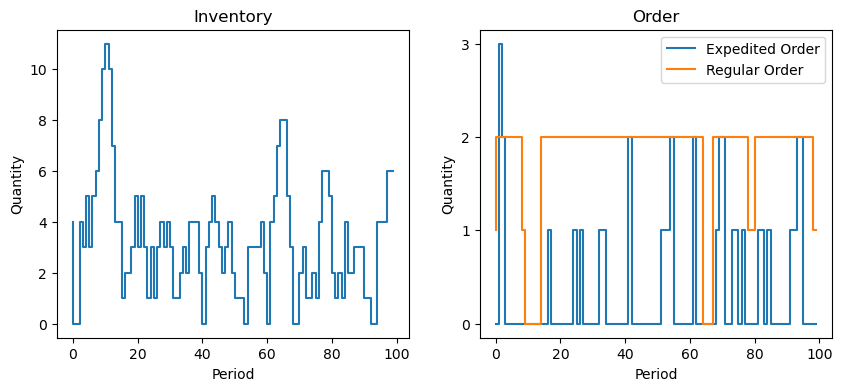

In [7]:
controller.plot(
    sourcing_model=dual_sourcing_model,
    sourcing_periods=100,
)